In [1]:
import pandas as pd
import glob, os


path ="/Users/hyelimpark/Dropbox/carto/indicadores_seccion_censal_csv" # use a path
allFiles = glob.glob(path + "/*.csv") # if there are more than one file

frame = pd.DataFrame() # data frame form
list_ = [] 
for file_ in allFiles: 
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)


frame.describe() # To describe the resume of dataframe

,ccaa,cpro,cmun,dist,secc,t1_1,t2_1,t2_2,t3_1,t3_2,...,t20_7,t20_8,t20_9,t21_1,t22_1,t22_2,t22_3,t22_4,t22_5,t22_6
count,35917.000000,35917.000000,35917.000000,35917.000000,35917.000000,35917.000000,35826.000000,35816.000000,35676.000000,35806.000000,...,16334.000000,14841.000000,14887.000000,35786.000000,31918.000000,33805.000000,30833.000000,29250.000000,26156.000000,26098.000000
mean,8.268146,25.538408,97.841273,3.272740,14.278392,1296.745274,642.189471,657.717082,209.894187,869.828939,...,38.395066,16.455764,13.995768,505.082295,126.271383,158.193758,120.437356,106.430769,26.762884,9.614338
std,4.639146,14.378958,120.117956,3.412732,25.680542,735.309526,376.022820,368.750039,175.548832,523.586709,...,37.585350,21.606118,21.608045,280.642805,85.974253,102.431828,71.944907,69.697412,27.941628,19.605248
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,11.000000,28.000000,1.000000,1.000000,825.000000,395.000000,420.000000,85.000000,520.000000,...,10.000000,0.000000,0.000000,330.000000,70.000000,95.000000,70.000000,60.000000,10.000000,0.000000
50%,9.000000,28.000000,69.000000,2.000000,4.000000,1225.000000,595.000000,630.000000,170.000000,810.000000,...,30.000000,10.000000,10.000000,480.000000,110.000000,145.000000,110.000000,95.000000,20.000000,0.000000
75%,12.000000,37.000000,122.000000,4.000000,15.000000,1700.000000,840.000000,865.000000,290.000000,1160.000000,...,55.000000,25.000000,20.000000,655.000000,165.000000,205.000000,160.000000,145.000000,40.000000,10.000000
max,19.000000,52.000000,915.000000,21.000000,220.000000,13070.000000,6865.000000,6205.000000,2915.000000,7420.000000,...,570.000000,315.000000,420.000000,6720.000000,1980.000000,4090.000000,995.000000,970.000000,395.000000,415.000000


In [4]:
import statsmodels.api as sm
from pandas.core import datetools


X = frame["cmun"]
y = frame["t1_1"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   t1_1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     91.75
Date:                Tue, 15 May 2018   Prob (F-statistic):           1.04e-21
Time:                        19:25:30   Log-Likelihood:            -2.8798e+05
No. Observations:               35917   AIC:                         5.760e+05
Df Residuals:                   35915   BIC:                         5.760e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1326.9790      4.998    265.510      0.000    1317.183    1336.775
cmun          -0.3090      0.032     -9.579      0.000      -0.372      -0.246
==============================================================================
Omnibus:                    10472.870   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76200.341
Skew:                           1.209   Prob(JB):                         0.00
Kurtosis:                       9.714   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [11]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [12]:
clf.fit(digits.data[:-1], digits.target[:-1])  #the [:-1] Python syntax, which produces a new array that contains all but the last entry of digits.data


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
clf.predict(digits.data[-1:])


array([8])

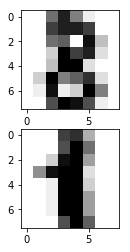

In [29]:
import matplotlib.pyplot as plt 

plt.figure(1)
plt.subplot(211)
plt.imshow(digits.images[8], cmap=plt.cm.gray_r) 

plt.subplot(212)
plt.imshow(digits.images[1], cmap=plt.cm.gray_r) 
plt.show()


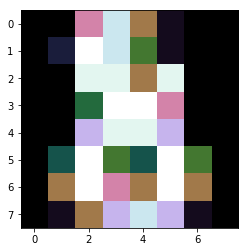

In [48]:
plt.imshow(digits.images[1796], cmap=plt.cm.cubehelix) 


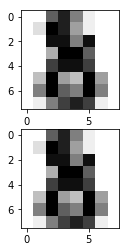

In [43]:
plt.figure(1)
plt.subplot(211)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r) 

plt.subplot(212)
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 
plt.show()


In [44]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [52]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)


array([0, 1, 2])